#. Problem Statement Description

*   **Objective**: To predict the class of dry beans based on the  physical characteristics such as area, perimeter, compactness, kernel length, kernel width, asymmetry coefficient, and length of kernel groove, using Decision Tree Classificaiton algorithm.
*   **Data Description**: The dataset contains a total of 13,611 samples, with 16 features for each sample. These include the following.
1) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2) Perimeter (P): Bean circumference is defined as the length of its border.

3 Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5) Aspect ratio (K): Defines the relationship between L and l.

6) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10) Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11) Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12) Compactness (CO): Measures the roundness of an object: Ed/L

13) ShapeFactor1 (SF1)

14) ShapeFactor2 (SF2)

15) ShapeFactor3 (SF3)

16) ShapeFactor4 (SF4)

The  features include physical characteristics of the nut. The target variable is the class of the dry bean, with seven different classes: SEKER, BARBUNYA, BMBAY, CALI, HOROZ, SIRA, and DERMASON.

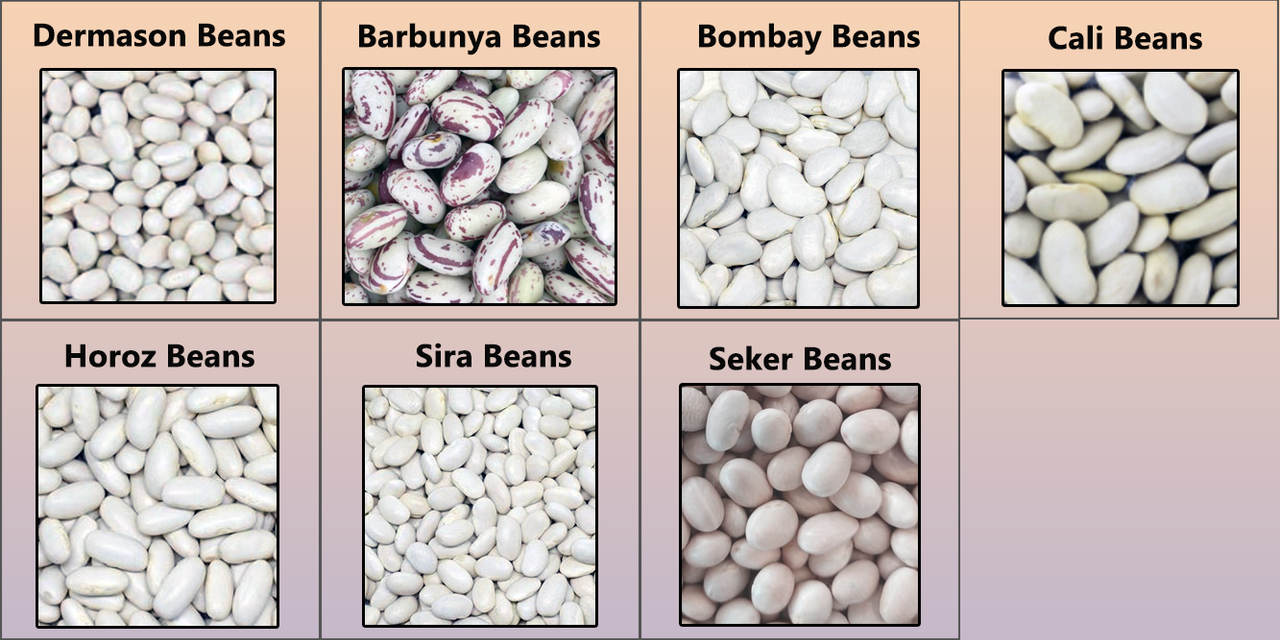

*   More information is available here: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

In [23]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

## Load Dataset

In [24]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
!unzip /content/DryBeanDataset.zip

df=pd.read_excel('/content/DryBeanDataset/Dry_Bean_Dataset.xlsx', sheet_name='Dry_Beans_Dataset')

df.head(10)

--2023-10-15 12:51:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘DryBeanDataset.zip.1’

DryBeanDataset.zip.     [   <=>              ]   4.52M  8.72MB/s    in 0.5s    

2023-10-15 12:51:54 (8.72 MB/s) - ‘DryBeanDataset.zip.1’ saved [4738776]

Archive:  /content/DryBeanDataset.zip
replace DryBeanDataset/Dry_Bean_Dataset.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: DryBeanDataset/Dry_Bean_Dataset.arff  
replace DryBeanDataset/Dry_Bean_Dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: DryBeanDataset/Dry_Bean_Dataset.txt  
replace DryBeanDataset/Dry_Bean_Dataset.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: DryBeanDataset/Dry_Bean_Dataset.xlsx  


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [26]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [27]:
df.shape

(13611, 17)

In [28]:
features=df.drop(('Class'),axis='columns')

target=df['Class']


In [29]:
features.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [30]:
target.head(5)

0    SEKER
1    SEKER
2    SEKER
3    SEKER
4    SEKER
Name: Class, dtype: object

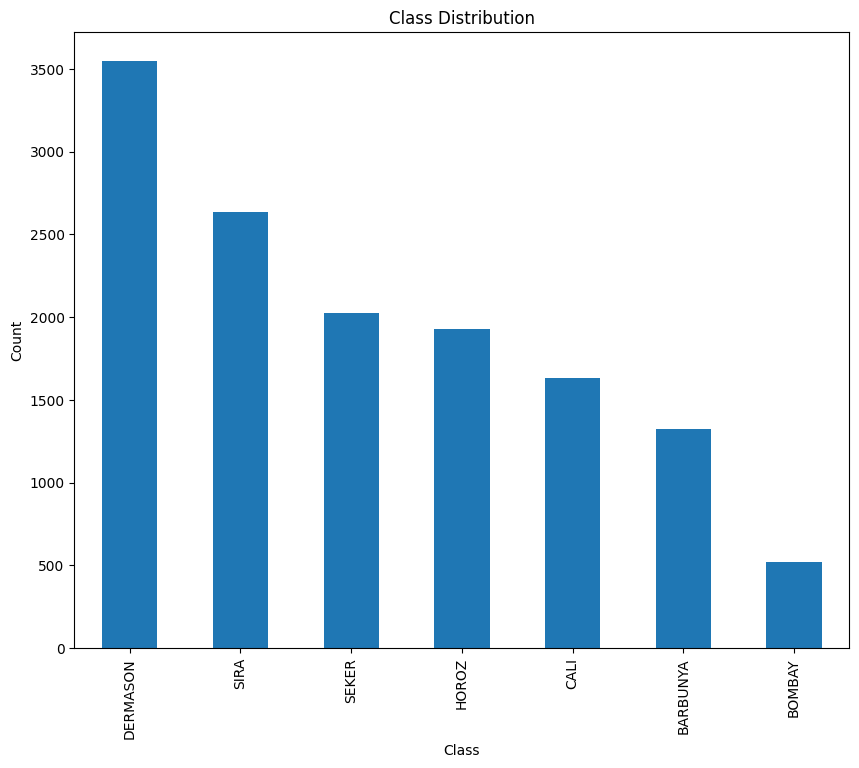

In [31]:
#plot class distibution
# Count the occurrences of each class

class_count=target.value_counts()


plt.figure(figsize=(10,8))
class_count.plot(kind="bar")
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

We can observe a huge class imbalance.




# **Feature Scaling**

In [32]:
# perform feature scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled,columns = features.columns)
features_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=0, shuffle=True)


# 5.   Peform Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a crucial step in understanding and analyzing any dataset.

Henceforth, all the analysis will be performed on the train dataset only. Assume that we do not possess the test data.

In [34]:
Train_data = pd.concat([X_train, y_train], axis = 'columns') #Join along the columns
Train_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2301,0.290820,0.388220,0.231364,0.645793,-0.460127,-0.196153,0.285882,0.455219,0.693006,0.333326,0.088930,0.384845,-0.924239,-0.249794,0.351017,0.439605,BARBUNYA
5659,-0.339299,-0.186173,0.094435,-0.748538,1.473481,1.163953,-0.337820,-0.317860,-1.060762,-0.240620,-0.985896,-1.396526,0.932844,-0.834422,-1.356139,-0.807050,HOROZ
8597,-0.312767,-0.346569,-0.350480,-0.201303,-0.331562,-0.053928,-0.313839,-0.282290,0.039123,0.116731,0.514511,0.240863,0.042784,0.136067,0.203965,0.360644,SIRA
6157,-0.070705,0.184610,0.575640,-0.546147,2.009970,1.367747,-0.072151,0.028681,-3.003373,0.077679,-1.231744,-1.787840,0.606792,-1.183590,-1.698443,-1.504490,HOROZ
4544,0.677001,0.927113,1.078488,0.573800,0.914755,0.895680,0.687476,0.871959,-1.975670,-1.105687,-0.816136,-0.994848,-0.801775,-1.137483,-0.992515,-1.971704,CALI


In [35]:
Train_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000
mean,0.005300,0.004654,0.003168,0.006683,-0.003738,-0.004708,0.005252,0.005048,0.003887,0.003253,0.001060,0.004603,-0.006618,0.000883,0.004764,0.009997
std,1.008666,1.006125,1.005140,1.007537,1.002215,1.001606,1.008575,1.006676,1.001420,1.006536,1.003618,1.002291,1.003174,1.001633,1.002319,0.997228
min,-1.112719,-1.542583,-1.593407,-1.773645,-2.194347,-5.108333,-1.111184,-1.551678,-3.960880,-14.569454,-6.446210,-2.581167,-3.356153,-1.932991,-2.356255,-10.850363
25%,-0.565785,-0.702535,-0.777750,-0.584180,-0.619195,-0.389416,-0.568493,-0.635615,-0.632975,-0.313025,-0.693010,-0.601558,-0.601231,-0.946047,-0.624457,-0.291301
50%,-0.286014,-0.281844,-0.275805,-0.216486,-0.136827,0.141007,-0.288784,-0.246740,0.213079,0.245599,0.168045,0.029184,0.069589,-0.029419,-0.009334,0.310868
75%,0.284374,0.571817,0.661604,0.333613,0.500172,0.646202,0.287939,0.447952,0.761045,0.622998,0.736105,0.563398,0.623329,0.766204,0.535594,0.650140
max,6.874044,5.273833,4.886372,5.735751,3.434007,1.744901,7.036141,5.345339,2.372678,1.616807,1.972582,2.909817,3.446551,3.270983,3.189098,1.069377


# Distribution of each feature by target variable
The boxplot can also be used to review the distribution of each feature by target variable. This may give us interesting insights.

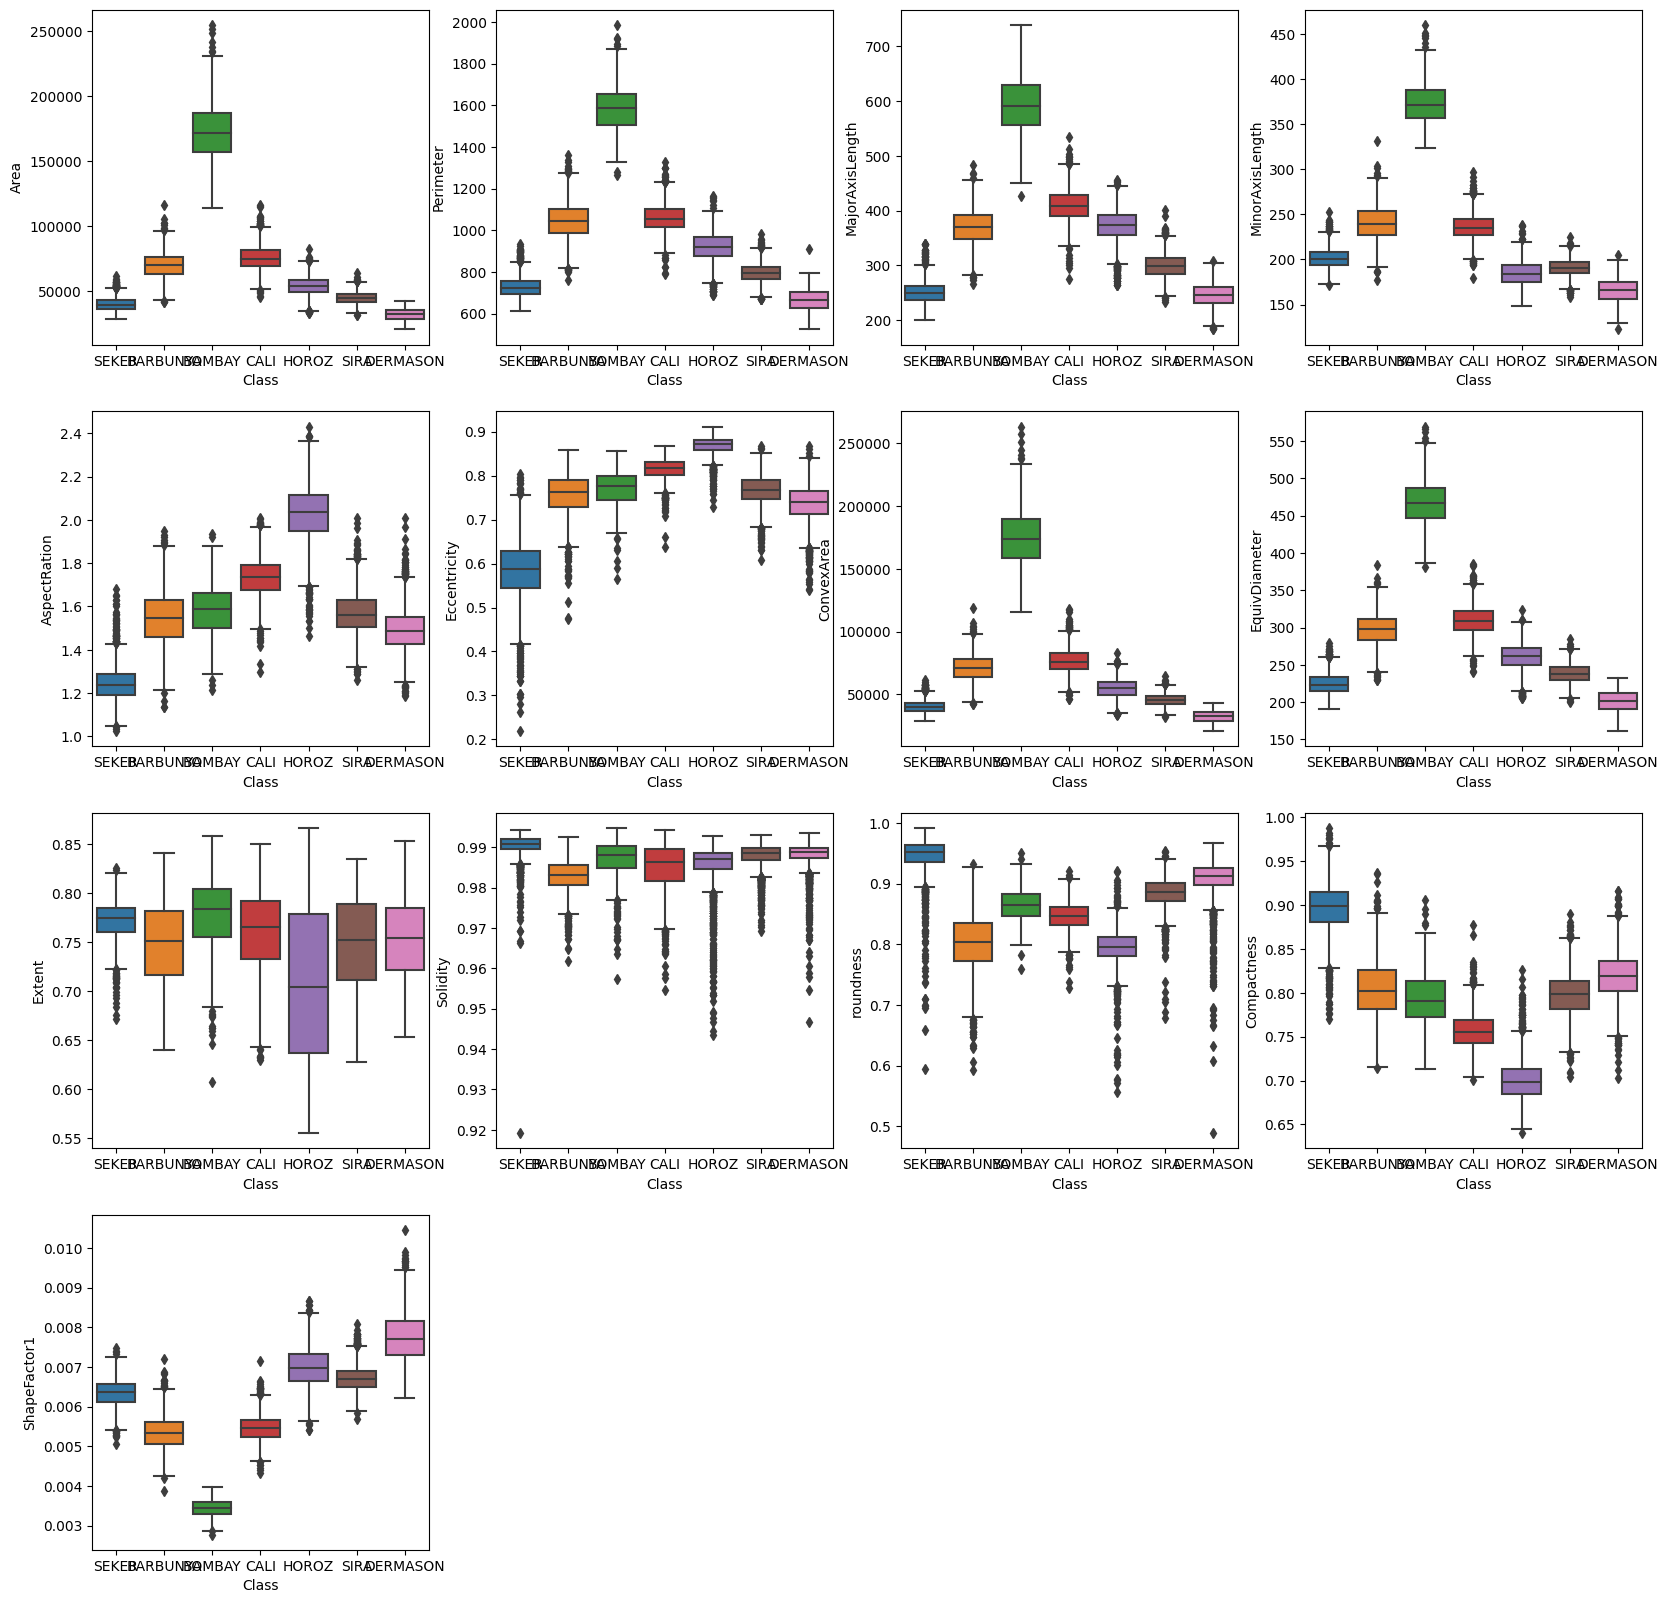

In [36]:
import seaborn as sns
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    if i < 13:
        sns.boxplot(data=df, x='Class', y=df.columns[i], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

We observe that *Solidity* does not give us any new information about the separability of various classes



In [37]:
Train_data.drop(['Solidity'],axis='columns',inplace=True)
X_test.drop(['Solidity'],axis='columns',inplace=True)
X_train.drop(['Solidity'],axis='columns',inplace=True)

### Correlation Analysis

Correlation analysis is a statistical technique used to understand the strength and direction of the relationship between two or more numerical variables. It helps in gaining insights into how changes in one variable are associated with changes in another.

Here are several reasons why we perform correlation analysis between numerical features:



**Identify Relationships**: Correlation analysis helps us identify whether there is a relationship between two or more variables. A high correlation suggests a strong relationship, while a low or near-zero correlation indicates a weak or no relationship.

**Feature Selection**: In machine learning, highly correlated features may provide redundant information. Identifying and removing one of them can reduce complexity and computational resources required for modeling.


Multicollinearity Detection: In regression analysis, multicollinearity occurs when two or more predictor variables are highly correlated. This can lead to problems in estimating the individual effect of each predictor variable. Correlation analysis can help identify multicollinearity.

Model Interpretability: Understanding the relationships between features can lead to more interpretable models. For example, if two features are highly correlated, it suggests that they may be capturing similar information.

Data Cleaning: Identifying correlations can highlight potential errors or outliers in the data. For example, if a strong correlation is expected between two variables but it's not observed, it might indicate a data quality issue.

Insights for Data Exploration: Correlation analysis can be a part of the initial data exploration process, helping to identify interesting patterns and relationships.

Hypothesis Testing: Correlation coefficients can be used for hypothesis testing to determine whether the relationship between two variables is statistically significant.

Decision Making: Understanding the relationships between variables can inform decision-making processes. For example, in business, knowing which factors are strongly correlated with sales can help in making marketing and sales strategies.

Risk Assessment: In finance and risk analysis, understanding correlations between different financial instruments or factors can help in managing and mitigating risks.

Preventing Overfitting: In some cases, highly correlated features can lead to overfitting in machine learning models. Detecting and handling correlated features can improve model generalization.


It's important to note that correlation does not imply causation. Even if two variables are highly correlated, it does not mean that changes in one variable cause changes in the other. Other factors or underlying relationships might be at play.

Overall, correlation analysis is a valuable tool in exploratory data analysis, feature selection, and model building, helping to uncover meaningful insights from numerical data.





Regenerate



In [38]:
#Perform correlation analysis between numerical features
corr_mat = Train_data.corr(method ='pearson', numeric_only=True) #Pearson correlation is used
corr_mat

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966918,0.932221,0.952043,0.239452,0.266729,0.999938,0.985161,0.059334,-0.354805,-0.266025,-0.848590,-0.639106,-0.270282,-0.349066
Perimeter,0.966918,1.000000,0.977325,0.913728,0.382534,0.390026,0.967893,0.991352,-0.016391,-0.544975,-0.404357,-0.864932,-0.766911,-0.406125,-0.422172
MajorAxisLength,0.932221,0.977325,1.000000,0.827001,0.547740,0.540998,0.932992,0.961842,-0.073150,-0.593067,-0.565999,-0.774066,-0.858664,-0.565981,-0.475918
MinorAxisLength,0.952043,0.913728,0.827001,1.000000,-0.010645,0.019583,0.951780,0.948948,0.150423,-0.208578,-0.013783,-0.947309,-0.471586,-0.018220,-0.256562
AspectRation,0.239452,0.382534,0.547740,-0.010645,1.000000,0.925022,0.241027,0.301050,-0.368928,-0.764763,-0.987757,0.026913,-0.837089,-0.978710,-0.448105
Eccentricity,0.266729,0.390026,0.540998,0.019583,0.925022,1.000000,0.268499,0.317681,-0.318915,-0.721132,-0.970740,0.020852,-0.860338,-0.981395,-0.446877
ConvexArea,0.999938,0.967893,0.932992,0.951780,0.241027,0.268499,1.000000,0.985416,0.057501,-0.359418,-0.267885,-0.848582,-0.640680,-0.272164,-0.355452
EquivDiameter,0.985161,0.991352,0.961842,0.948948,0.301050,0.317681,0.985416,1.000000,0.033427,-0.432897,-0.325256,-0.892929,-0.712432,-0.328177,-0.384991
Extent,0.059334,-0.016391,-0.073150,0.150423,-0.368928,-0.318915,0.057501,0.033427,1.000000,0.343148,0.353168,-0.145980,0.234759,0.346656,0.149223
roundness,-0.354805,-0.544975,-0.593067,-0.208578,-0.764763,-0.721132,-0.359418,-0.432897,0.343148,1.000000,0.765992,0.228356,0.780560,0.761121,0.469367


<Axes: >

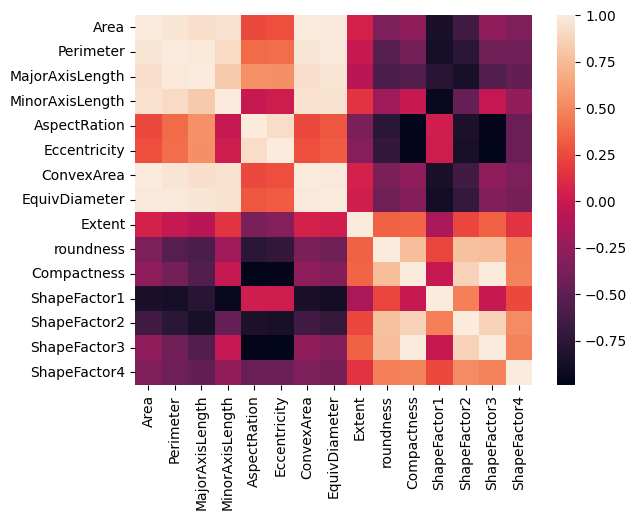

In [41]:
import seaborn as sb

sb.heatmap(corr_mat)

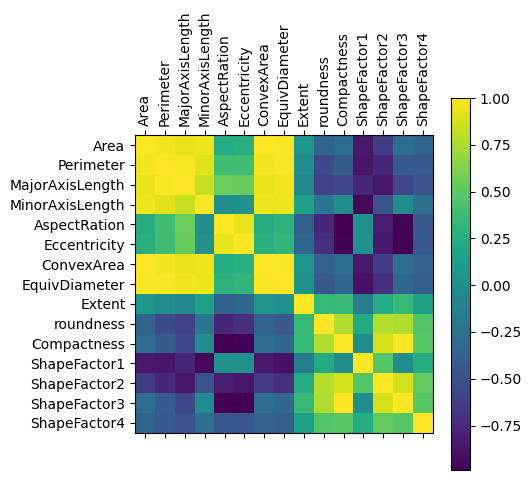

In [42]:
# Visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

We observe the following.



*   Area, Perimeter, MajorAxisLength
MinorAxisLength, ConvexArea and EquivDiameter are all related. One of these could be kept while dropping the others.
*   Compactness is completely correlated with ShapeFactor3, one of these could be dropped.
*   Aspect Ratio is positively correlated with Eccentricity and negatively correlated with AspectRation. Thus it could be deleted.





In [43]:
Train_data.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3', 'AspectRation'], axis=1, inplace=True)
X_train.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3', 'AspectRation'], axis=1, inplace=True)
X_test.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3', 'AspectRation'], axis=1, inplace=True)



In [44]:
corr_mat = Train_data.corr(method ='pearson', numeric_only=True) #Pearson correlation is used
corr_mat

,Area,Eccentricity,Extent,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
Area,1.000000,0.266729,0.059334,-0.354805,-0.266025,-0.848590,-0.639106,-0.349066
Eccentricity,0.266729,1.000000,-0.318915,-0.721132,-0.970740,0.020852,-0.860338,-0.446877
Extent,0.059334,-0.318915,1.000000,0.343148,0.353168,-0.145980,0.234759,0.149223
roundness,-0.354805,-0.721132,0.343148,1.000000,0.765992,0.228356,0.780560,0.469367
Compactness,-0.266025,-0.970740,0.353168,0.765992,1.000000,-0.011606,0.868172,0.482422
ShapeFactor1,-0.848590,0.020852,-0.145980,0.228356,-0.011606,1.000000,0.468625,0.240989
ShapeFactor2,-0.639106,-0.860338,0.234759,0.780560,0.868172,0.468625,1.000000,0.524222
ShapeFactor4,-0.349066,-0.446877,0.149223,0.469367,0.482422,0.240989,0.524222,1.000000


<Axes: >

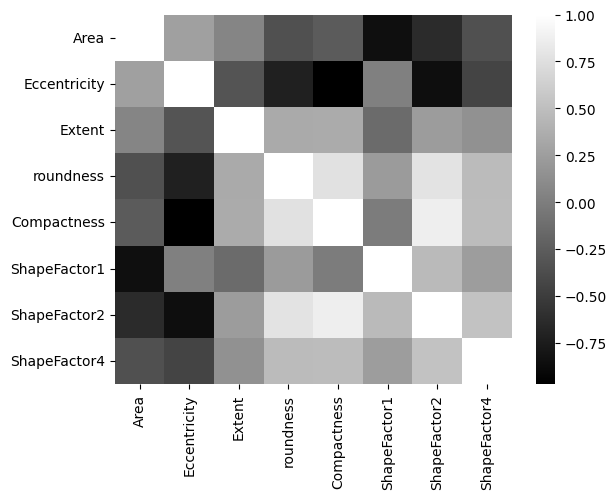

In [47]:
sb.heatmap(corr_mat ,cmap='gray')

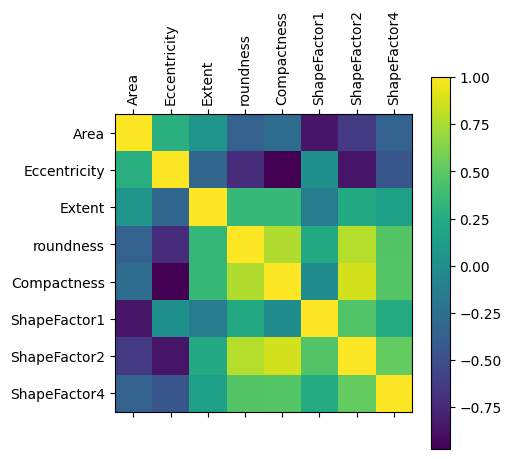

In [46]:
# Visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

#6.   Model Building: Training and Testing

Let us define a Decision Tree model to perform the given classification task.

In [48]:
#Import Decision Tree Classifier class
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy') #Define an object of Decision Tree Classifier class

model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set

###  Result and Interpretation

F-1 Score

The F1 score is a metric used in binary classification tasks, which combines both precision and recall into a single value. It provides a balance between the two, making it a useful metric when you want to consider both false positives and false negatives.

In [49]:
from sklearn.metrics import f1_score, confusion_matrix

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on test data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  1.0
Train confusion matrix: 
 [[1067    0    0    0    0    0    0]
 [   0  430    0    0    0    0    0]
 [   0    0 1280    0    0    0    0]
 [   0    0    0 2811    0    0    0]
 [   0    0    0    0 1538    0    0]
 [   0    0    0    0    0 1651    0]
 [   0    0    0    0    0    0 2111]]
Test F1 score:  0.898
Test confusion matrix: 
 [[224   0  16   0   2   4   9]
 [  1  91   0   0   0   0   0]
 [ 25   0 312   0   9   1   3]
 [  0   0   0 656   7  16  56]
 [  2   0  12   3 362   0  11]
 [  1   0   0   7   0 355  13]
 [  4   0   3  59   7   6 446]]


There seems no miss-classifications in the train data. The F1-score on train data is 1. The test data has an F1 score of 0.896. It seems to be a case of **overfitting**.

Let us tune the max_depth hyperparameter and see if we can improve the results.

In [50]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=8) #Set max depth to 8
model1.fit(X_train, y_train) #Training the model on train data
y_pred_train = model1.predict(X_train) #Make predictions on the training set
y_pred = model1.predict(X_test) #Make predictions on the testing set

#Check evaluation metrices

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.942
Train confusion matrix: 
 [[ 989    0   49    1    2    4   22]
 [   0  430    0    0    0    0    0]
 [  50    1 1217    0    5    2    5]
 [   0    0    0 2654    0   22  135]
 [   6    0   16   10 1468    0   38]
 [   4    0    0   25    0 1592   30]
 [   2    0    4  180    6   19 1900]]
Test F1 score:  0.912
Test confusion matrix: 
 [[223   1  17   0   3   2   9]
 [  1  91   0   0   0   0   0]
 [ 22   0 318   0   5   2   3]
 [  0   0   0 679   3  14  39]
 [  1   0  13   4 360   0  12]
 [  1   0   0   4   0 355  16]
 [  1   0   3  56   3   4 458]]


Can we improve it further?

In [51]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=12) #Set max depth to 12
model2.fit(X_train, y_train) #Training the model on train data
y_pred_train = model2.predict(X_train) #Make predictions on the training set
y_pred = model2.predict(X_test) #Make predictions on the testing set

#Check evaluation metrices

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.982
Train confusion matrix: 
 [[1057    0    2    0    0    0    8]
 [   0  430    0    0    0    0    0]
 [  14    0 1264    0    1    0    1]
 [   0    0    0 2692    0    0  119]
 [   0    0    1    2 1532    0    3]
 [   0    0    0    1    0 1645    5]
 [   4    0    0   25    4   12 2066]]
Test F1 score:  0.902
Test confusion matrix: 
 [[228   0  12   0   3   5   7]
 [  1  91   0   0   0   0   0]
 [ 26   0 311   0   9   1   3]
 [  0   0   0 649   8  16  62]
 [  1   0  13   3 364   0   9]
 [  2   0   0   6   0 356  12]
 [  4   0   1  47  11   6 456]]


Again, the gap between train and test evaluaion metrics has drastically increased. Hence, we will stick to Model1 which had the max_depth of 8.

However, so far we haven't accounted for class imbalance. This can be done using 'balaced' class weights.

In [52]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=8, class_weight='balanced') #Set class_weight to 'balanced' to counter class imbalance
model3.fit(X_train, y_train) #Training the model on train data
y_pred_train = model3.predict(X_train) #Make predictions on the training set
y_pred = model3.predict(X_test) #Make predictions on the testing set

#Check evaluation metrices

# Print the evaluation metrics on train data
F1_train = f1_score(y_train, y_pred_train, average='weighted')
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train F1 score: ", np.round(F1_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

# Print the evaluation metrics on train data
F1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test F1 score: ", np.round(F1, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train F1 score:  0.928
Train confusion matrix: 
 [[1017    0   33    0    1    3   13]
 [   0  430    0    0    0    0    0]
 [  48    0 1214    0   13    0    5]
 [   1    0    0 2451    3   33  323]
 [   8    0   16    7 1474    1   32]
 [   3    0    1   23    0 1585   39]
 [  21    0    5  100   17   45 1923]]
Test F1 score:  0.9
Test confusion matrix: 
 [[228   0  15   0   2   4   6]
 [  0  92   0   0   0   0   0]
 [ 32   0 311   0   4   1   2]
 [  0   0   0 636   2  11  86]
 [  3   0   5   1 364   0  17]
 [  2   0   0   2   0 359  13]
 [  7   0   1  40   7  11 459]]


 Although, the gap between both the cases (model 1 & 3) has been the same, i.e., 0.028; we would prefer the latter model as it is trained for a more generalized case by taking class imbalance into consideration. Even when the F1-scores of model3 are lesser than that of model1, the values are still higher than 0.9 and hence are preferred.